In [1]:
!pip  install nnabla
!pip install nnabla-ext-cuda101
!git clone https://github.com/sony/nnabla-examples.git
%cd nnabla-examples

     |████████████████████████████████| 14.8MB 314kB/s 
     |████████████████████████████████| 7.4MB 50.9MB/s 
     |████████████████████████████████| 25.3MB 176kB/s 
     |████████████████████████████████| 14.3MB 325kB/s 
  Found existing installation: nnabla 1.9.0
    Uninstalling nnabla-1.9.0:
      Successfully uninstalled nnabla-1.9.0
Cloning into 'nnabla-examples'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (188/188), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 2673 (delta 81), reused 146 (delta 58), pack-reused 2485
Receiving objects: 100% (2673/2673), 27.60 MiB | 10.10 MiB/s, done.
Resolving deltas: 100% (1410/1410), done.


In [2]:
%cd nnabla-examples/


/content/nnabla-examples


In [3]:
import nnabla as nn

import nnabla.functions as F
import nnabla.parametric_functions as PF
import nnabla.solvers as S
from nnabla.monitor import tile_images

import numpy as np
import matplotlib.pyplot as plt
import tiny_digits
#matplotlib inline

np.random.seed(0)
imshow_opt = dict(cmap='gray', interpolation='nearest')

digits = tiny_digits.load_digits(n_class=10)
tiny_digits.plot_stats(digits)

#plt.show()

data = tiny_digits.data_iterator_tiny_digits(digits, batch_size=64, shuffle=True)

img, label = data.next()
plt.imshow(tile_images(img), **imshow_opt)
print("labels: {}".format(label.reshape(8, 8)))
print("Label shape: {}".format(label.shape))


# Forward pass
x = nn.Variable(img.shape)  # Define an image variable
with nn.parameter_scope("affine1"):
    y = PF.affine(x, 10)  # Output is 10 class

t = nn.Variable(label.shape)  # Define an target variable
loss = F.mean(F.softmax_cross_entropy(y, t))  # Softmax Xentropy fits multi-class classification problems

print(x.shape)
print(y.shape)
print(t.shape)
print(loss.shape)  # empty tuple means scalar


x.d = img
t.d = label
# Execute a forward pass
loss.forward()
# Showing results
print("Prediction score of 0-th image: {}".format(y.d[0]))
print("Loss: {}".format(loss.d))

2020-06-27 03:53:45,716 [nnabla][INFO]: Initializing CPU extension...


ModuleNotFoundError: ignored

In [ ]:
print(nn.get_parameters())

OrderedDict([('affine1/affine/W', <Variable((64, 10), need_grad=True) at 0x7feb84f39048>), ('affine1/affine/b', <Variable((10,), need_grad=True) at 0x7feb84f4c408>)])


In [ ]:
for param in nn.get_parameters().values():
    param.grad.zero()

In [ ]:
# Compute backward
loss.backward()
# Showing gradients.
for name, param in nn.get_parameters().items():
    print(name, param.shape, param.g.flat[:20])  # Showing first 20.

affine1/affine/W (64, 10) [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  3.1451762e-01  2.2530122e-04
 -4.6851587e-02 -6.0762573e-02  6.3644449e-04 -2.0253170e-01
  8.7928891e-02 -4.6494704e-02 -1.5426296e-02 -3.1241389e-02]
affine1/affine/b (10,) [ 0.03753503 -0.09367488 -0.03121927 -0.06802998 -0.06231093  0.61294395
 -0.0296303  -0.17176978 -0.11591194 -0.0779319 ]


In [ ]:
learning_rate = 1e-3
solver = S.Sgd(learning_rate)
solver.set_parameters(nn.get_parameters())  # Set parameter variables to be updated.

In [ ]:
# One step of training
x.d, t.d = data.next()
loss.forward()
solver.zero_grad()  # Initialize gradients of all parameters to zero.
loss.backward()
solver.weight_decay(1e-5)  # Applying weight decay as an regularization
solver.update()
print(loss.d)

15.457939


In [ ]:
for i in range(5000):
    x.d, t.d = data.next()
    loss.forward()
    solver.zero_grad()  # Initialize gradients of all parameters to zero.
    loss.backward()
    solver.weight_decay(1e-5)  # Applying weight decay as an regularization
    solver.update()
    if i % 100 == 0:  # Print for each 10 iterations
        print(i, loss.d)

0 0.4466617
100 0.4770356
200 0.5257788
300 0.37753928
400 0.18897423
500 0.5024208
600 0.2694479
700 0.1959987
800 0.14201796
900 0.17780781
1000 0.201103
1100 0.13402665
1200 0.17208889
1300 0.23563789
1400 0.16889988
1500 0.08942253
1600 0.12080401
1700 0.091579765
1800 0.06710656
1900 0.3558392
2000 0.14239505
2100 0.0988615
2200 0.108713694
2300 0.11804438
2400 0.116035804
2500 0.15874235
2600 0.051535822
2700 0.05826531
2800 0.15169814
2900 0.096734434
3000 0.07809006
3100 0.42719477
3200 0.122430936
3300 0.12062447
3400 0.13316977
3500 0.074152246
3600 0.047550194
3700 0.32086784
3800 0.085215956
3900 0.05159476
4000 0.050577566
4100 0.058642894
4200 0.17417073
4300 0.24651015
4400 0.12784608
4500 0.051525757
4600 0.27554172
4700 0.19152734
4800 0.036134366
4900 0.08243171


prediction:
[[7 8 6 2 2 5 5 5]
 [1 2 0 3 8 2 4 9]
 [0 9 5 8 3 6 7 9]
 [9 4 0 9 6 1 0 8]
 [7 1 9 6 7 3 1 8]
 [3 9 8 6 3 9 8 5]
 [4 2 4 4 2 2 1 7]
 [6 1 3 8 6 2 3 6]]


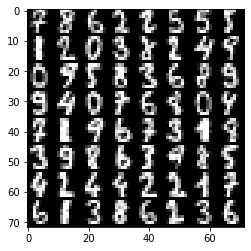

In [ ]:
x.d, t.d = data.next()  # Here we predict images from training set although it's useless.
y.forward()  # You can execute a sub graph.
plt.imshow(tile_images(x.d), **imshow_opt)
print("prediction:")
print(y.d.argmax(axis=1).reshape(8, 8))  # Taking a class index based on prediction score.
